# STAGE 2 : Factor Construction 

###  Purpose 
This notebook performs **Stage 2** of the Portfolio Optimization pipeline:  
**Price-based and Fundamental-based factor construction.**

We will:
1. Compute **technical price factors** (Momentum, Volatility, Liquidity, Size Proxy)  
2. Generate **synthetic fundamental data** (if not available)  
3. Compute **fundamental factors** (Value and Quality) 
4. Combine all factors into a single **factor matrix**   
5. Save final factor datasets for use in modeling and optimization stages.
6. Visualize cross-factor correlations


In [13]:
import os
os.chdir(r"d:\Portfolio Optimzation project")

print(os.getcwd())
print("Current working directory changed successfully.")


d:\Portfolio Optimzation project
Current working directory changed successfully.


In [14]:
import os
print(os.listdir("scripts"))


['backtester.py', 'combine_factors.py', 'data_cleaner.py', 'data_loader.py', 'factor_builder.py', 'factor_builder_fundamental.py', 'generate_fundamentals.py', 'merge_processed_data.py', 'ml_model.py', 'portfolio_optimizer.py', 'stress_tester.py', 'tempCodeRunnerFile.py', 'utils.py', 'verify_all_processed_data.py', 'visualizer.py', '__init__.py', '__pycache__']


In [15]:
import sys, os
print("Current Working Directory:", os.getcwd())
print("sys.path entries:\n", "\n".join(sys.path))
print("\nContents of scripts/:", os.listdir("scripts"))


Current Working Directory: d:\Portfolio Optimzation project
sys.path entries:
 c:\ProgramData\anaconda3\envs\portfolio_opt\python310.zip
c:\ProgramData\anaconda3\envs\portfolio_opt\DLLs
c:\ProgramData\anaconda3\envs\portfolio_opt\lib
c:\ProgramData\anaconda3\envs\portfolio_opt

C:\Users\rajya\AppData\Roaming\Python\Python310\site-packages
c:\ProgramData\anaconda3\envs\portfolio_opt\lib\site-packages
c:\ProgramData\anaconda3\envs\portfolio_opt\lib\site-packages\win32
c:\ProgramData\anaconda3\envs\portfolio_opt\lib\site-packages\win32\lib
c:\ProgramData\anaconda3\envs\portfolio_opt\lib\site-packages\Pythonwin
d:\Portfolio Optimzation project

Contents of scripts/: ['backtester.py', 'combine_factors.py', 'data_cleaner.py', 'data_loader.py', 'factor_builder.py', 'factor_builder_fundamental.py', 'generate_fundamentals.py', 'merge_processed_data.py', 'ml_model.py', 'portfolio_optimizer.py', 'stress_tester.py', 'tempCodeRunnerFile.py', 'utils.py', 'verify_all_processed_data.py', 'visualizer.p

In [ ]:
# 🧹 Full clean + proper re-imports
%reset -f

import sys, os, importlib

# Re-initialize after reset
project_root = r"D:\Portfolio Optimzation project"
if project_root not in sys.path:
    sys.path.append(project_root)

importlib.invalidate_caches()
print(" Environment cleaned & project path added:", project_root)


✅ Environment cleaned & project path added: D:\Portfolio Optimzation project


In [17]:
import os

path = r"D:\Portfolio Optimzation project\scripts"
print("Exists:", os.path.exists(path))
print("Files inside scripts:", os.listdir(path))
print("__init__.py exists:", os.path.exists(os.path.join(path, "__init__.py")))


Exists: True
Files inside scripts: ['backtester.py', 'combine_factors.py', 'data_cleaner.py', 'data_loader.py', 'factor_builder.py', 'factor_builder_fundamental.py', 'generate_fundamentals.py', 'merge_processed_data.py', 'ml_model.py', 'portfolio_optimizer.py', 'stress_tester.py', 'tempCodeRunnerFile.py', 'utils.py', 'verify_all_processed_data.py', 'visualizer.py', '__init__.py', '__pycache__']
__init__.py exists: True


In [18]:
import importlib.util, os

file_path = os.path.join("scripts", "factor_builder.py")
print("File exists:", os.path.exists(file_path))

spec = importlib.util.spec_from_file_location("scripts.factor_builder", file_path)
print("Spec:", spec)


File exists: True
Spec: ModuleSpec(name='scripts.factor_builder', loader=<_frozen_importlib_external.SourceFileLoader object at 0x0000024DA2F916F0>, origin='d:\\Portfolio Optimzation project\\scripts\\factor_builder.py')


In [19]:
import importlib.util, os, sys

module_path = os.path.join(os.getcwd(), "scripts", "factor_builder.py")
spec = importlib.util.spec_from_file_location("factor_builder", module_path)
module = importlib.util.module_from_spec(spec)
sys.modules["factor_builder"] = module
spec.loader.exec_module(module)

print("Module loaded manually!")
print("Functions available:", dir(module))


Module loaded manually!
Functions available: ['BASE_DIR', 'PROCESSED_PATH', 'RESULT_PATH', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'build_price_factors', 'compute_liquidity', 'compute_momentum', 'compute_returns', 'compute_size_proxy', 'compute_volatility', 'normalize_factors', 'np', 'os', 'pd', 'tqdm']


In [20]:
import os
import sys
project_root = os.path.abspath(os.path.join(os.getcwd(),".."))
if project_root not in sys.path:
    sys.path.append(project_root)
print("Project root added to sys.path:", project_root)

Project root added to sys.path: d:\


In [29]:
import os
print(" Current Working Directory:", os.getcwd())


 Current Working Directory: d:\Portfolio Optimzation project


In [30]:
import sys
for p in sys.path:
    if "Portfolio" in p:
        print("YES", p)

YES d:\Portfolio Optimzation project
YES D:\Portfolio Optimzation project


In [ ]:
import sys, os

# Automatically detect project root (one level above notebooks/)
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add to Python path
if project_root not in sys.path:
    sys.path.append(project_root)

print("Project root added:", project_root)
print("Scripts available:", os.listdir(os.path.join(project_root, "scripts")))

Project root added: d:\


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'd:\\scripts'

In [39]:
from scripts.factor_builder import build_price_factors
from scripts.generate_fundamentals import generate_fundamentals
from scripts.factor_builder_fundamental import build_fundamental_factors
from scripts.combine_factors import combine_factors
print(" All imports successful!")


 All imports successful!


In [27]:
# ---- Imports ----
import os, sys
import pandas as pd

#  Ensure project root path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

# ---- Import factor-related scripts ----
from scripts.factor_builder import build_price_factors
from scripts.generate_fundamentals import generate_fundamentals
from scripts.factor_builder_fundamental import build_fundamental_factors
from scripts.combine_factors import combine_factors

# ---- Paths ----
BASE_DIR = r"D:\Portfolio Optimzation project"
RESULT_DIR = os.path.join(BASE_DIR, "results", "factors")
os.makedirs(RESULT_DIR, exist_ok=True)


##  Stage 2A – Price-Based Factor Construction

This stage computes **technical price factors** from `merged_prices.csv`.

**Input:** `processed_data/merged_prices.csv`  
**Output:** `results/factors/price_factors.csv`

| Factor | Description |
|---------|-------------|
| `returns` | Daily percentage return |
| `momentum` | 126-day cumulative price change |
| `volatility` | 60-day rolling std. of returns |
| `liquidity` | 60-day rolling mean of volume |
| `size_proxy` | log(price × volume) |

All factors are z-score normalized cross-sectionally per date.


In [41]:
# Run price factor construction
build_price_factors()


 Loading merged price data...
 Computing factors...


c:\ProgramData\anaconda3\envs\portfolio_opt\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


 Saving to: D:\Portfolio Optimzation project\results\factors\price_factors.csv
 Price-based factor matrix saved successfully!


###  Preview Price Factors


In [42]:
price_factors_path = os.path.join(RESULT_DIR, "price_factors.csv")
price_df = pd.read_csv(price_factors_path, parse_dates=["date"])
price_df.head()


,date,ticker,momentum,volatility,liquidity,size_proxy
0,2015-08-05 00:00:00+05:30,360ONE_DAILY,-0.268362,-0.586314,-0.445944,-1.849891
1,2015-08-06 00:00:00+05:30,360ONE_DAILY,-0.216935,-0.586200,-0.445136,-1.883441
2,2015-08-07 00:00:00+05:30,360ONE_DAILY,-0.279748,-0.600034,-0.457554,-1.188529
3,2015-08-10 00:00:00+05:30,360ONE_DAILY,-0.289557,-0.599530,-0.459082,-1.241071
4,2015-08-11 00:00:00+05:30,360ONE_DAILY,-0.266339,-0.594882,-0.457766,-1.703545


### Example Visualization – Momentum vs Volatility


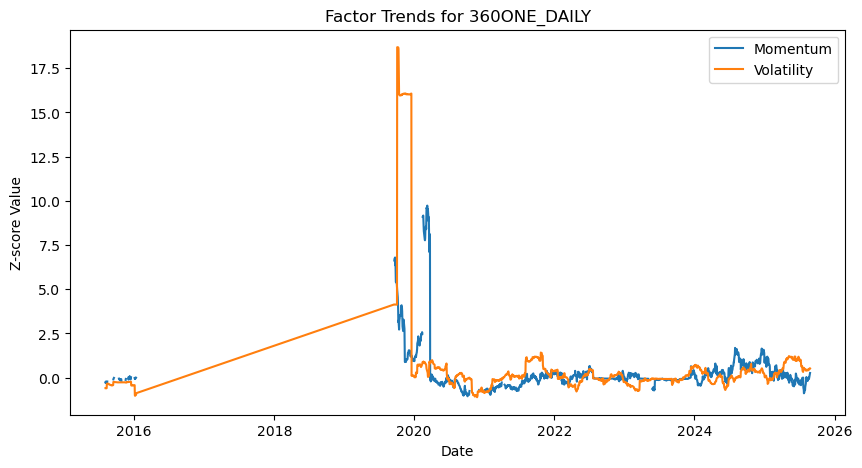

In [43]:
import matplotlib.pyplot as plt

sample_ticker = price_df["ticker"].unique()[0]
df_plot = price_df.query("ticker == @sample_ticker")

plt.figure(figsize=(10,5))
plt.plot(df_plot["date"], df_plot["momentum"], label="Momentum")
plt.plot(df_plot["date"], df_plot["volatility"], label="Volatility")
plt.title(f"Factor Trends for {sample_ticker}")
plt.xlabel("Date")
plt.ylabel("Z-score Value")
plt.legend()
plt.show()


##  Stage 2B – Fundamental Factor Construction

If real fundamentals are unavailable, we’ll create dummy data.

**Scripts Used:**
1. `generate_fundamentals.py` – creates synthetic `fundamental_factors.csv`
2. `factor_builder_fundamental.py` – computes normalized Value and Quality factors


In [44]:
generate_fundamentals()
build_fundamental_factors()


 Reading tickers from merged_prices.csv ...
 Saved dummy fundamentals to: D:\Portfolio Optimzation project\results\factors\fundamental_factors.csv
 Shape: (1988, 7) | Unique tickers: 497
 Loading fundamental data...
 Computing value and quality factors...
 Saving processed factors to: D:\Portfolio Optimzation project\results\factors\fundamental_factors_processed.csv
 Fundamental-based factors saved successfully!


###  Preview Processed Fundamental Factors


In [45]:
fundamental_processed_path = os.path.join(RESULT_DIR, "fundamental_factors_processed.csv")
fund_df = pd.read_csv(fundamental_processed_path, parse_dates=["date"])
fund_df.head()


,date,ticker,value_composite,quality_composite
0,2019-09-12 00:00:00+05:30,360ONE_DAILY,-0.538997,0.462681
1,2019-09-16 00:00:00+05:30,360ONE_DAILY,1.244057,-0.587097
2,2019-09-17 00:00:00+05:30,360ONE_DAILY,-0.211545,1.044901
3,2019-09-18 00:00:00+05:30,360ONE_DAILY,0.637918,0.291179
4,2019-09-12 00:00:00+05:30,3MINDIA_DAILY,-0.266278,-0.106797


##  Stage 2C – Combine All Factors

Now we merge price-based and fundamental-based factors into a unified factor matrix.

**Input:**  
- `price_factors.csv`  
- `fundamental_factors_processed.csv`  

**Output:**  
- `combined_factor_matrix.csv`  
- `factor_heatmap.png` (correlation visualization)


In [46]:
combine_factors()


 Loading price and fundamental factor files...
 Merging on [date, ticker]...
 Combined dataset shape: (1560, 8)
 Saved combined factor matrix → D:\Portfolio Optimzation project\results\factors\combined_factor_matrix.csv
 Generating factor correlation heatmap...
 Heatmap saved → D:\Portfolio Optimzation project\reports\plots\factor_heatmap.png
 Stage 2C completed successfully!


###  Verify Combined Factor Matrix


In [49]:
combined_path = os.path.join(RESULT_DIR, "combined_factor_matrix.csv")
combined_df = pd.read_csv(combined_path, parse_dates=["date"])
combined_df.head()


,date,ticker,momentum,volatility,liquidity,size_proxy,value_composite,quality_composite
0,2019-09-12 00:00:00+05:30,3MINDIA_DAILY,-0.145609,-0.131404,-0.306795,0.778231,-0.266278,-0.106797
1,2019-09-16 00:00:00+05:30,3MINDIA_DAILY,-0.200808,-0.115914,-0.306284,1.768316,-0.322639,1.093652
2,2019-09-17 00:00:00+05:30,3MINDIA_DAILY,-0.200341,-0.115660,-0.305994,0.651378,-0.411522,-1.382477
3,2019-09-18 00:00:00+05:30,3MINDIA_DAILY,-0.251793,-0.114980,-0.304601,0.029881,-0.435802,-0.127681
4,2019-09-12 00:00:00+05:30,AARTIIND_DAILY,0.140553,-0.086716,-0.296803,-0.643893,4.978329,-1.048683


##  Factor Correlation Heatmap
This shows how different factors relate to each other — useful for identifying redundant or complementary signals.


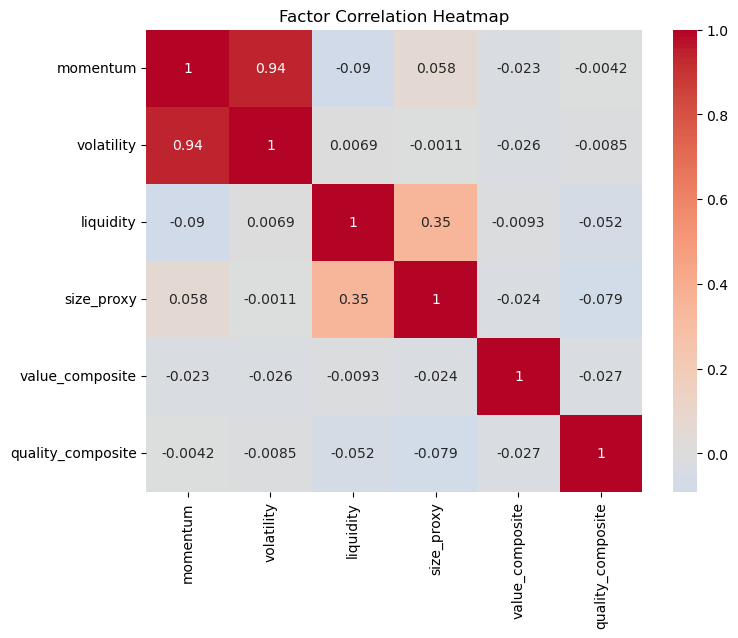

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

factor_cols = ["momentum", "volatility", "liquidity", "size_proxy",
               "value_composite", "quality_composite"]

corr = combined_df[factor_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Factor Correlation Heatmap")
plt.show()


##  Summary

| Stage | Description | Output |
|--------|--------------|---------|
| 2A | Price-based factors | `price_factors.csv` |
| 2B | Fundamental-based factors | `fundamental_factors_processed.csv` |
| 2C | Combined factor matrix | `combined_factor_matrix.csv` + `factor_heatmap.png` |

**Next Step →** Proceed to `03_ml_prediction.ipynb` for machine learning–based signal modeling and portfolio optimization.
